# Introduction
* So far, we have covered 2 essential parts of Logistic Regression:
## 1. Predictions
* This just dealt with: how do we get from the input to the output of the model
* we called this making predictions
## 2. Training
* The second part was a little harder, we looked at how to make our model **learn**
* We did this by constructing an **objective function**, and minimized it using **gradient descent**
* We call this **learning**, or **training**, or **fitting**
* The whole goal of this is to find out **weights**, (w)

## These are the two main functions for any supervised machine learning model!

---

# Practical issues: 
## 1. Regularization
* Overfitting can happen when the model performs too well on its training data, but its not really training data that we really care about
* Where machine learning models become very powerful is when they predict things for us in the future! It doesn't matter how well our model predicts stock returns over the past year, we want to be able to predict stock returns tomorrow
* Overfitting can happen for any number of reasons, **one of which is having irrelevant inputs in your model**
* We are going to look at how to bring the weights for irrelevant inputs down to 0

## 2. Problem with Cost Function
* It is defined such that infinite weights are the ideal solution!
* We will see exactly how this happens, and how we can fix it!

## 3. A Straight Line is too Limiting
* There are some data sets that we can visually see are clearly separable, but not by a line/plane

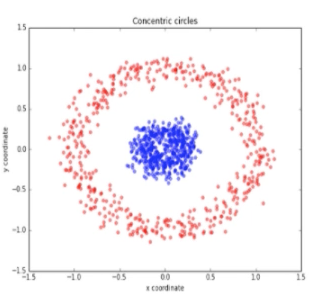

* Logistic regression can't solve this because it is constrained to be straight, and a line can't separate the 2 classes
* We will look at one way around this problem in this section (think back to andrew NG course)

---
# Interpreting the Weights 
## Linear Regression 
* Like linear regression, the logistic regression weights are very interpretable and very intuitive
* Recall, for linear regression: 
    > * $w_i$ is the amount y will increase if $x_i$ is increased by 1, and all other $x$'s remain constant

## Logistic Regression 
* With logistic regression, the idea is similar!
* Lets first focus on just the binary scenario
* The output prediction from a logistic regression model is going to be 1 or 0
* So the weight is either going to bring the output closer to 1, or closer to 0
* Intuitively, we know that a bigger weight means a bigger effect
* If $w_i$ is large and positive, then a small increase in $x_i$ (assuming $x_i$ is positive), will push the output closer to 1
* If $w_i$ is big and negative, then a small increase in $x_i$ (assuming $x_i$ is positive), will push the output closer to 0

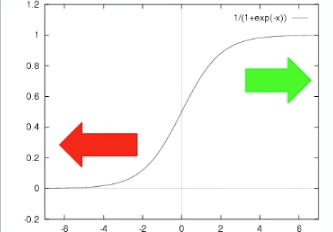

* In other words, larger magnitude means larger impact on the output

## Can we intepret weights similarly to linear regression? 
* Yes! 
* First, lets recall the interpration of the logistic model:

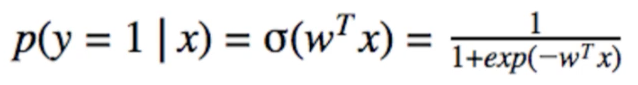

* It is the probability that y=1 (class is 1) given x (input)
* Hence, if we subtract it from 1 (remember, binary!), we get the probability the y=0, given x. 

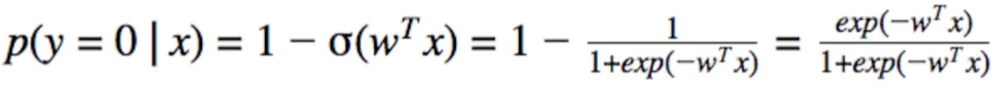

### Next: Calculate the Odds
* most people have only heard of "odds" in a casual context
* odds are a concept in probability that is pretty old school, modern course won't teach you about it
* usually it is referrenced in relation to gambling, or other non scientific fields
* However, the odds are just the ratio of 2 probabilities:
### $$odds = \frac{p(event\;does\;happen)}{p(event\;doesn't\;happen)}$$
* so in our case that is:
### $$odds = \frac{p(y=1|x)}{p(y=0|x)}$$
* If we write down this expression in terms of $w$ and $x$:

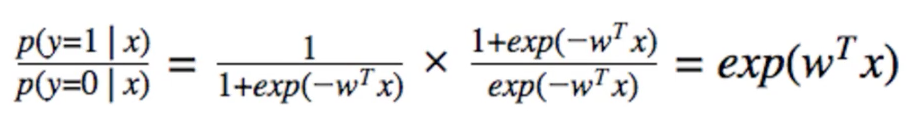

* If we then take the log of both sides, notice that the right side is exactly like linear regression!!!
* The left sides, the log of the odds, is appropriately called the "log odds"

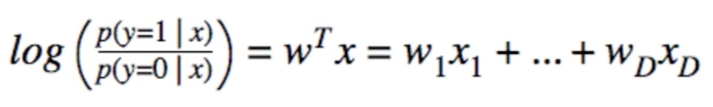

* We can think about it like we are doing linear regression on the log odds

### What does this mean in terms of intepreting the weights?
* Now we can use our "linear regression way" of interpreting the weights
* $w_i$ is the amount the log odds will increase if $x_i$ increases by 1, and all other x's remain constant
* This interpretation is something that may show up in statistics, but we don't really talk about it in deep learning
* In deep learning, logistic regression is thought of as a neuron
* When you have millions of neurons connected together, this "nice and simple" interpretation disappears

---
# L2 Regularization (Ridge) - Theory
* We are going to look at a few sides of the problem, so we fully understand regularization, and the implications

## Generalization and Overfitting
* Recall our "Gaussian Cloud" problem from the last section
* We have 2 clouds: 
    * one is centered at (-2,-2)
    * The other is centered at (2, 2)
    
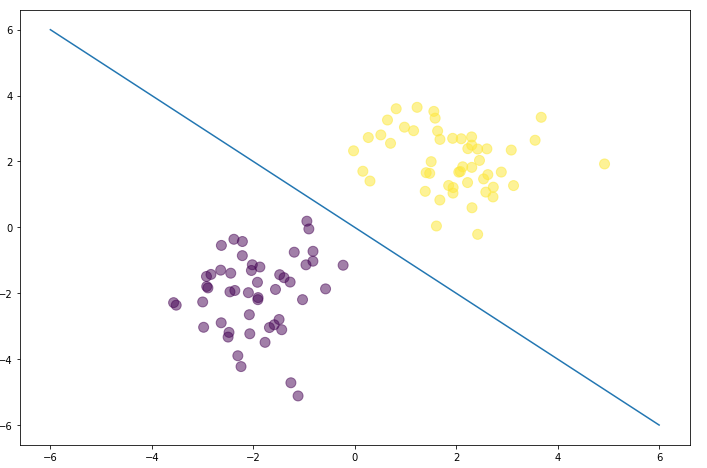

* We found an exact Bayesian Solution!
* It was: w = [0, 4, 4]
* Which we were able to represent using y = mx + b (this is high school math!)
* Note that this y represents the y coordinate of the x-y plane, NOT the y output of logistic regression!
* And then we get: 0 + 4x + 4y = 0
* And finally: y = -x
* This means that we have a slope of -1, and y-intercept of 0
* This should case you to scratch your head a bit though! Why is the Bayesian solution (4,4)? Why not (1,1)? Or (10,10)?
* These all represent the same line!
* This is the first hint as to why we may need regularization!

### Objective function
* We need to consider the objective function
* Now, this y is the output of logistic regression:

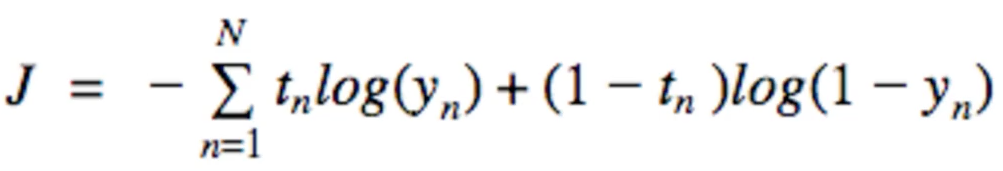

* Take a test point $(x_1, x_2)$ = (1,1) and existing weights (0, 4, 4)
* This should be classified as y = 1
* And now if we plug this into our current logistic regression model: 
### $$\sigma(0 + 4*1 + 4*1) = \sigma(8) = 0.99966$$
* What would be better than that? Exactly 1!
* So, with:
### $$y = \sigma(8)$$
* We get an objective J:
### $$J = -0.00033354063728$$
* Now, what if our weights had been (0, 1, 1)? Well, then our objective is:
### $$J = -0.1269....$$
* This is not as good! 
* And what if our weights were (0, 10, 10)? Then our objective is:
### $$J = -2.06e-9....$$
* Hence, we can see that under this model the best weights are actually:
### $$w = (0, \infty, \infty)$$
* In a computer, that is an error!

## Regularization 
* People generally explain regularization in terms of overfitting and **regression** 

### Regularization: Regression

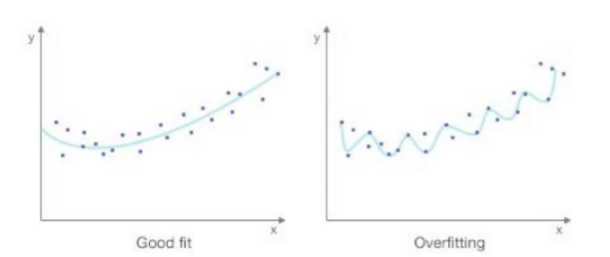

* However, we are not doing regression right now, so that scenario isn't really applicable
* In fact, if your data fills up the space of all the possible inputs, you shouldn't over fit even if your model is very complex! 
* That is why we like having lots of data
* Your model overfits when it has to "guess" what the output has to be in a space it has never seen
* But if your training data is well spread out, and covers all of the possibilities, you can train to do well on that data
* AKA, if test data looks just like training data, and you do well on your training data, then you will do well on your test data 

### Regularization: Logistic Regression/classification
* Now the scenario is different - we could have a perfectly split up dataset that covers the entire possible input space, and logistic regression would still tryo to go to w = (0, infinity, infinity)
* The solution is of course, regularization!
* Regularization penalizes very large weights
* So we have our existing cost function, J, which is the cross entropy: 

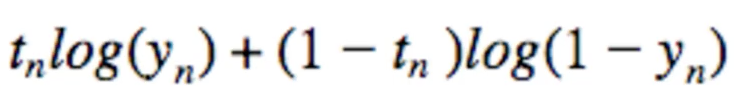

* And we now add a penalty for big weights:
### $$J_{reg} = J + \Big(\frac{\lambda}{2}\Big)*(w)^2 = J + \Big(\frac{\lambda}{2}\Big)*w^Tw $$
* This term makes our cost grow larger if any of the weights grow bigger
* This encourages the weights to be close to 0
* So now we wouldn't get a weight like (0, 10, 10), because that would make your cost very large!
* $\lambda$ is what we call a smoothing parameter (usually 0.1-1), but it depends on your data
* The larger lambda is, the closer the weights will go to zero
* The smaller lambda is, the more that the weights will just try to minimize the cross entropy
* No universal way to choose the best lambda

## Solving for weights
* remember that to do gradient descent, all we need to do is take the gradient of the objective function and move in that direction
* Now we want:
### $$\frac{dJ_{reg}}{dw}$$ 
* instead of:
### $$\frac{dJ}{dw}$$
* Since addition doesn't effect the gradient calculation, you just take all of the gradients separately
* So, we just need to focus on the gradient of the regularization penalty (Since we already have the gradient of the cost from before)
* One way to do this is to look at each scalar parameter 
* since the penalty (regularization cost) is equal to:
### $$ regularization\;cost=\Big(\frac{\lambda}{2}\Big)(w_0^2+w_1^2+w_2^2...)$$
* then the derivative with respect to any particular $w_i$ is just:
### $$\frac{d(regularization\;cost)}{dw_i} = \lambda*w_i$$
* and if we then wanted to vectorize this: 
### $$\frac{d(regularization\;cost)}{dw_i} = \lambda*w$$
* and finally we can add this to our original gradient of the cross entropy cost:
### $$\frac{dJ_{reg}}{dw} = X^T(Y-T)+\lambda*w$$ 

## Probabilistic Perspective
* Lets now look at another interpretation of regularization
* remember that we like to interpret our models in terms of probabilities 
* We know that with the cross entropy, what we are really doing is maximizing the likelihood, since J = -log(likelihood)
* So now lets go back to the objective function perspective, so that it is something we are trying to maximize
### $$J_{reg} = \Big[tlogy+(1-t)log(1-y)\Big] + \Big(\frac{\lambda}{2}\Big)*(w)^2$$
* and now if we exponentiate J_reg:
### $$exp(J) = y^t(1-y)^{(1-t)}exp\Big(\frac{-\lambda}{2}*(w)^2\Big)$$
* We see that the first part now has an exponential distribution for the likelihood- in this case it is Bernoulli (**the likelihood**)
* But now we have this other squared term! What happens when we exponentiate a negative squared term? 
* Well that is just a **Gaussian Distribution!** (**the prior**)
* So we can see that:
### $$t \approx Bernoulli(y)$$
* and
### $$w \approx N(0,\frac{1}{\lambda})$$
* This gives us our first steps towards a **Bayesian Perspective** in machine learning!

## Probabilistic Bayesian Perspective
* We can see above that we have one probability distribution times another probability distribution 
    * in this case a bernoulli distributions times a gaussian distribution
* We call the the we call this gaussian distribution over the weights a **prior**
* This means that it represents our prior beliefs about the weights
    * in particular it represents the belief that they should be small and centered around 0
    * The variance of this gaussian distribution of $\frac{1}{\lambda}$
    * $\lambda$ is also called the precision, which is the inverse of variance
* this is seen over and over again in bayesian machine learning
* so in this case we have:

### Likelihood
### $$t \approx Bernoulli(y)$$

### Prior
### $$w \approx N(0, \frac{1}{\lambda})$$

### Posterior
### $$posterior \propto likelihood*prior$$

### Think! 
So lets take a second to really process this! 
> * We originally had a **cost function**, $J$, (the **cross entropy error**), which we saw was equivalent to the **log likelihood**. 
  * This cost function was parameterized by $y$, our predictions, which in turn were parameterized by $w$, our weights. 
  * By finding the weights, that let our predictions maximize the **likelihood**, we found the optimal solution
  * Recall, the likelihood was: $L(x|w)$, where $w$ was used to solve for $y$. This means the likelihood of observing the data we did, given a certain set of weights
  * If we **don't** take bayes rule into account, then we can see that $p(y|x) = L(x|w) = L(x|y)$
  * or more specifically: $p(y=1|x) = L(x|y)$ 
  * *However*, this is where bayes rule, and regularization come into play!
  * from a bayesian perspective, the regularization term can be thought of as the **prior** beliefs about our weights!
  * By following bayes rule, we know that multiplying the prior times the likelihood will give us our **posterior** set of beliefs about the probability of the weights, or, in other words, the probability of y being a certain class!
  
  
### Bayes Rule
### $$p(w|X,Y) \propto p(X, Y|w)*p(w)$$
* where in the equation above y is representing our targets, NOT predictions. This may cause confusion. In other words it can be represented as:
### $$p(w|X,t) \propto p(X, t|w)*p(w)$$
* This is just a consequence of Bayes Rule
### $$p(A|B)=\frac{p(B|A)*p(A)}{p(B)}$$
* where the bottom part, $p(B)$ is just the top part, marginalized over B
### $$\sum_Bp(A,B) = \sum_B(p(A|B)p(B))$$
* Since the sum over B, of the joint distribution $p(A,B)$, is just $p(A)$
* In other words, it is just a normalizing constant, that makes it a probability that sums to 1
* We have special name for this as well...

### Without Regularization:
* we maximize the likelihood!

### With regularization:
* We are no longer trying to maximize the likelihood!
* We are now trying to maximize the **posterior**
* this is called the **maximum a posteriori**, or **MAP** estimation 

---
# L2 Regularization - Code
* So we will use a good deal of the code from last time, we are going to add a regularization term now
* Below is code we are reusing:

In [3]:
import numpy as np
N = 100
D = 2 

X = np.random.randn(N,D)

X[:50, :] = X[:50, :] - 2*np.ones((50,D))
X[50:, :] = X[50:, :] + 2*np.ones((50,D))

T = np.array([0]*50+[1]*50)

ones = np.array([[1]*N]).T
Xb = np.concatenate((ones, X), axis=1)

w = np.random.randn(D + 1)

z = Xb.dot(w)

def sigmoid(z):
    return 1/(1 + np.exp(-z))

Y = sigmoid(z)

def cross_entropy(T, Y): 
    E = 0
    for i in range(N):
        if T[i] == 1:
            E -= np.log(Y[i])
        else:
            E -= np.log(1 - Y[i])
    return E

learning_rate = 0.1 

And below we are added the regularization term, as seen in the comments. Remember the regularization term is:
### $$regularization \; term = \Big(\frac{\lambda}{2}\Big)*w^Tw $$
And its gradient is:
### $$\frac{d(regularization\;cost)}{dw_i} = \lambda*w$$

In [4]:
for i in range(100): 
    # print cross entropy every 10 steps to see that it is decreasing
    if i % 10 == 0:
        print(cross_entropy(T, Y))

        # adding our regularization term
        # Prior to regularization it was: 
        # w += learning_rate * Xb.T.dot(T - Y)
        lambda_term = 0.1
        w += learning_rate * ((Xb.T.dot(T - Y))- lambda_term*w)
        Y = sigmoid(Xb.dot(w))
        
print("Final w:", w)

31.3730238873
0.0673704285297
0.0696654725317
0.0720083508438
0.0743990329135
0.076837468329
0.0793235879054
0.081857304732
0.0844385151615
0.0870670997201
Final w: [-0.39377663  4.09316933  4.73163379]


We can see here that we get values for the weights that are much closer to 0, so they don't blow up and go to infinity. As we increase our lambda value, we can see the weight values shrink!

---
# L1 Regularization
* in previous lectures we have talked about generalization and overfitting
* we have seen that even when we add a column of completely random noise to our data, we can still improve our training score, which can also be thought of as $R^2$. Remember, $R^2$ is the proportion of variance explained- where 0 means none of the variance in the response is explained, and 1 means all of the variance in the response is explained.
* In general, we want the dimensionality of our input matrix X to be much smaller than the number of samples N
### $$D << N$$ 
or 
### $$number \; of \; features << number \; of \; samples$$
* So another problem that we can run into is that in certain data sets, the dimensionality is much greater than the number of samples 
* One way to visualize this is the x input matrix
* We want the x matrix to be skinny, in other words we want N to be large, and D to be small
* If we have the opposite situation, where x is fat because D is large and N is small, this could cause potential problems and we need to take steps to avoid this

## L1 Regularization: Overview 
* Goal: select a small number of important features the predict the trend, and remove all of the features that are just noise
* We do NOT want to let noise influence the output!
* We call this **sparsity** because the end result is that most of the weights will be 0
* And only a few or the weights will be non zero
* L1 regularization helps us achieve sparsity!

## L1 Regularization: Theory
* L1 regularization has a pretty similar setup to L2
* again, we just add a penalty term to the original cost
* Since we use a multiple of the L2 norm of the weights for the penalty term 
* we will similarly use the L1 norm of the weights for the penalty term in L1 regularization 
* We called L2 regularization **ridge regression** 

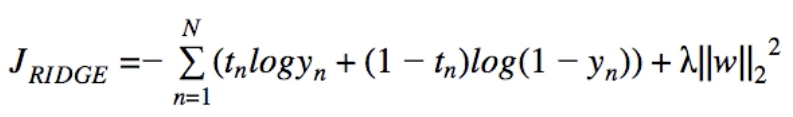

* We call L1 regularization **lasso regression**
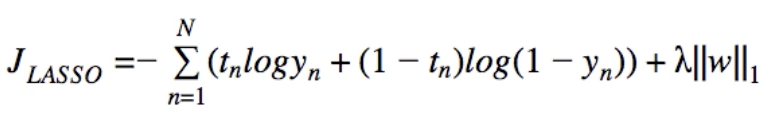

### Big difference between L1 and L2
* In L1 the regularization term is using the absolute value, in L2 it is squared! 
* The key difference between these techniques is that Lasso shrinks the less important feature’s coefficient to zero thus, removing some feature altogether. So, this works well for feature selection in case we have a huge number of features.

### Probability distributions
* Before we move on to solve this problem, lets look at the probability distributions involved: 
* as we know, the exponential of the negative of a square is the gaussian distribution! 
* So for L2 regularization we had a **Bernoulli Likelihood** and **Gaussian Prior** on $w$
* However, in L1 regularization, we know longer have a gaussian prior on w

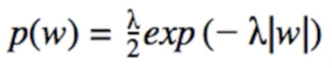

* So what distribution has a negative absolute value in the exponent? 
* The **laplace distribution**!
* So with L1 regularization we are putting a laplace distributed prior on the weights, and we are solving for the posterior of w, with the laplace prior

### Process to solve
* For logistic regression, we already know the process to solve this type of problem 
* we just calculate the gradient, and move in that direction
* For L1 regularization, we already know how to take the gradient of the first part

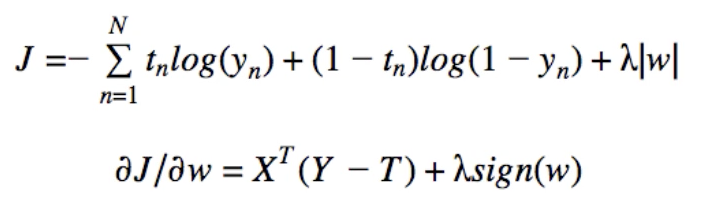

* Note: the sign function, sign(x), returns 1 if x >0, -1 if x < 0, or 0 if x = 0 
* we then use the same gradient descent algorithm we have already been using 

---

# L1 Regularization - Code
* The strategy is, we are going to generate some data where the input is a fat matrix, while y only depends on a few of the features. The rest of the features will just be noise. 
* then we will use L1 regularization to see if we can find a sparse set of weights that identifies the useful dimensions of x

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

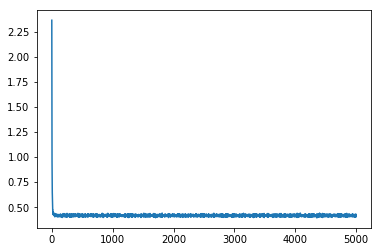

In [6]:
def sigmoid(z):
    return 1 /(1 + np.exp(-z))

# this is a fat matrix
N = 50
D = 50

# uniformly distributed numbers between -5 and +5
X = (np.random.random((N,D)) - 0.5)*10

# the first 3 dimensions effect the output, but the last 47 do not (All noise)
true_w = np.array([1, 0.5, -0.5] + [0]*(D-3))

# generate y, the target
Y = np.round(sigmoid(X.dot(true_w) + np.random.randn(N)*0.5))

# now lets perform gradient descent
costs = []
w = np.random.randn(D) / np.sqrt(D)
learning_rate = 0.001
L_1 = 10.0
for t in range(5000):
    Yhat = sigmoid(X.dot(w))
    delta = Yhat - Y
    w = w - learning_rate*(X.T.dot(delta) + L_1*np.sign(w))
    
    cost = -(Y*np.log(Yhat) + (1-Y)*np.log(1 - Yhat)).mean() + L_1*np.abs(w).mean()
    costs.append(cost)
    
plt.plot(costs)
plt.show()



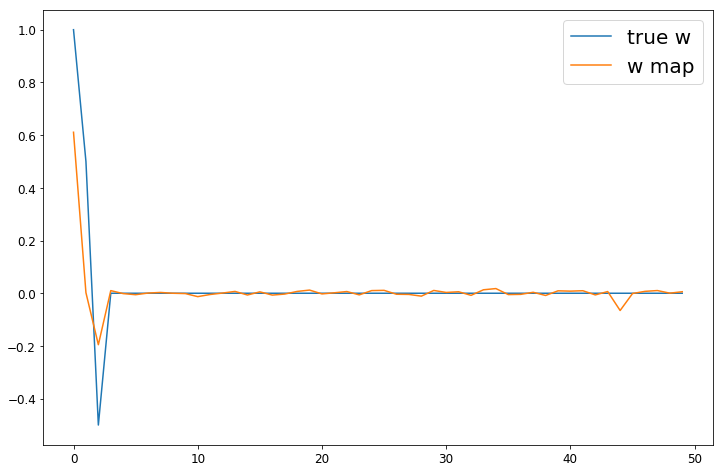

In [7]:
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(true_w, label='true w')
plt.plot(w, label='w map')
ax.legend(['true w', 'w map'], fontsize=20)
ax.tick_params(labelsize="large")
plt.show()

# fig, ax = plt.subplots(figsize=(12,8))
# plt.plot(train_costs, label='train cost')
# plt.plot(test_costs, label='test cost')

# # setting axes
# ax.set_xlabel('Iterations of gradient descent', fontsize=20)
# ax.set_ylabel('Cost', fontsize=20)
# ax.tick_params(labelsize="large")
# ax.legend(['train cost', 'test cost'], fontsize=20)
# plt.show()

## What can we see?
By increasing our regularization term (L1) we can decrease the valeus of certain weights towards 0! The weights that correspond to noise slowly are pushed to zero as we increase L1, as we can see above. 

---
# L1 vs. L2 Regularization
* What exactly is the difference? 
* We are going to look at the result first, then at how they emerge from the math! 

### L1 encourages...
A sparse solution! A few weights that are non-zero, and many that equal to 0

### L2 encourages...
Small weights! All w's close to 0, but not exactly 0

### Both...
Help prevent overfitting, by not fitting to noise. 
* L1 accomplishes this by choosing the most important features
* L2 accomplishes this by making the assertion that none of the weights are extremely large

# Intuiton
* Lets think of a 1 dimensional weight:

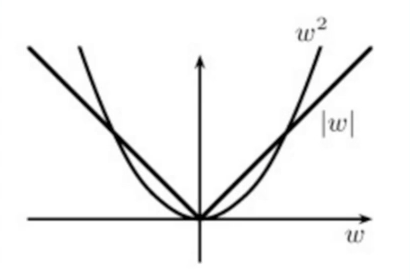

* For L2 regularization, we get the negative log prior of w to be quadratic
* For L1 regularization, we get the negataive log prior of w to be the absolute function 
* The key thing to consider here is the derivative of these functions (since the solution uses gradient descent, and gradient descent goes in the direction of the derivative!).


## Key intuition: the derivative
* Gradient descent goes in the direction of the derivative, and these terms are incorporated into gradient descent, so lets take a look at their derivatives
### Quadratic Derivative:
* For a quadratic, the closer you get to zero, the smaller your derivative gets, since it also approaches 0
* So for L2 regularization, when L2 is already small, then further gradient descent won't change it that much

### Absolute Derivative: 
* The gradient is constan - it is either +1 or -1 (magnitude of 1), or 0 at w = 0 
* So for L1 regularization, gradient descent will go towards zero at a constant rate! 
* Then when it arrives at 0, it stays their forever! 

## Conclusion
* That is why L2 regularization encourages weights to be small, while L1 regularization encourages weights to be 0, and hence sparsity!

# ElasticNet
* It is possible to include L1 and L2 simultaneously! (fancy name for this is ElasticNet)

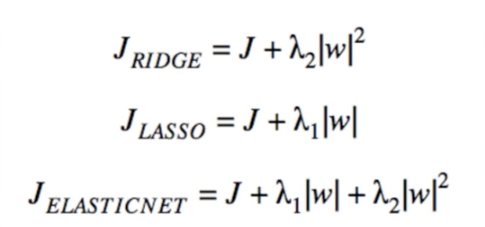

* This may sound fancy, but as we can see above it is really just adding the L1 penalty and L2 penalty to your cost function 


---
# The Donut Problem
* Lets start with a visualization to get a better feel for this problem

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

N = 10000
D = 2

Now the idea is that we have two radius's: an inner and an outer. 

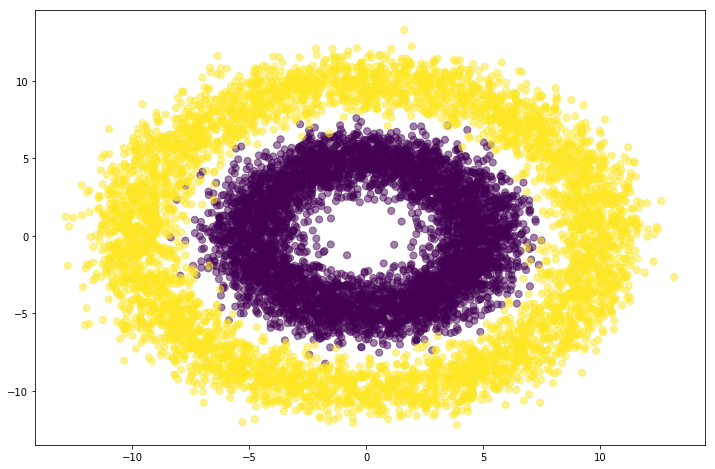

In [39]:
R_inner = 5
R_outer = 10

# ------------------ inner radius -----------------
# create a uniformly distributed variable for half of the data, that depends on the inner radius
R1 = np.random.randn(int(N/2)) + R_inner

# generate some angles (polar coordinates that are uniformly distributed)
theta = 2*np.pi*np.random.random(int(N/2))

# now lets convert polar coordinates into x y coordinates
X_inner = np.concatenate([[R1 * np.cos(theta)], [R1 * np.sin(theta)]]).T
                                
# ------------------ outer radius -----------------
R2 = np.random.randn(int(N/2)) + R_outer
theta = 2*np.pi*np.random.random(int(N/2))
X_outer = np.concatenate([[R2 * np.cos(theta)], [R2 * np.sin(theta)]]).T

# now lets calculate entire X by concatenating X_inner and X_outer together
X = np.concatenate([X_inner, X_outer])

# Set targets
T = np.array([0]*(int(N/2)) + [1]*(int(N/2)))

# plot 
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1], c=T, s=50, alpha=0.5)
plt.show()

# Donut Problem
* Above we can see the donut problem 
* Our classes are not linearly seperable! In other words, there is no line that can separate these classes. 
* However, there is a way we can still make logistic regression work in this case!
* So back to our code, we are going to start with creating a column of 1s for the bias term
* But the trick for the donut problem, is we are also going to create another column! 
* It is going to represent the radius of the point! 

In [58]:
ones = np.array([[1]*N]).T
r = np.zeros((N,1))

# calculate the radius from the origin for each point
for i in range(N): 
    r[i] = np.sqrt(X[i,:].dot(X[i,:]))

# concatenate 1s, radius, and X all together    
Xb = np.concatenate((ones, r, X), axis=1)

# randomly initialize some weights
w = np.random.rand(D+2)

# this code is the same as before
z = Xb.dot(w)

def sigmoid(z):
    return 1/(1 + np.exp(-z))

Y = sigmoid(z)

def cross_entropy(T, Y): 
    E = 0
    for i in range(N):
        if T[i] == 1:
            E -= np.log(Y[i])
        else:
            E -= np.log(1 - Y[i])
    return E

24247.3228805


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log


42622.7374882
367.714400712
353.134902643
340.544360533
329.54471022
319.839506768
311.203110854
303.460515011
296.473739674
290.132420987
284.34715054
279.044667686
274.164327065
269.655461531
265.475385099
261.587860815
257.961911328
254.570885488
251.391718529
248.404340323
245.591198043
242.936868095
240.4277383
238.051745866
235.798159955
233.657400193
231.620884342
229.680899759
227.830494408
226.063384013
224.373872608
222.756784276
221.207404265
219.721428
218.29491678
216.924259151
215.606137109
214.337496462
213.115520731
211.937608132
210.801351199
209.704518711
208.645039617
207.620988708
206.630573814
205.672124335
204.74408096
203.844986412
202.973477117
Final w: [ -2.30106888e+01   3.06968955e+00   5.32961099e-03   5.24755296e-03]
Final classification rate:  0.9947


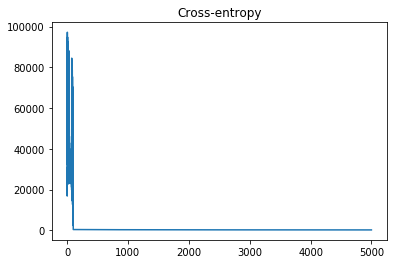

In [69]:
# set the learning rate
learning_rate = 0.0001

error = []
for i in range(5000):
    e = cross_entropy(T, Y)
    error.append(e)
    if i % 100 == 0:
        print(e)

    # gradient descent with regularization 
    w += learning_rate * ( np.dot((T - Y).T, Xb) - 0.01*w)

    # recalculate our prediction 
    Y = sigmoid(Xb.dot(w))
plt.plot(error)
plt.title("Cross-entropy")
print ("Final w:", w)
print ("Final classification rate: ", 1 - np.abs(T - np.round(Y)).sum()/N)

# Final Classification Rate
* we end up with a pretty good final classification rate
* The weights are pretty interesting 
* We can see that the x and y weights are nearly 0! (they are the last two terms in the weights array)
* this shows that the classification doesn't really depend on the x or y coordinate at all according to our model!
* We can see that it depends on the bias and radius weights
* If we put in a small radius value, we automatically have a negative bias term, which pushes our prediction down to zero
* If we have a larger radius, it pushes the classification towards 1!

--- 
# The XOR Problem